<a href="https://colab.research.google.com/github/IE-304/IE-304/blob/main/5.1_MLR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
Created on Sun Nov 10 23:02:46 2024
@author: 元智大學工業工程與管理學系, 鄭春生 教授
"""
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

傳統迴歸分析方式-全部資料用來建模

In [28]:
#Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/IE-304/IE-304/refs/heads/main/5.0_Advertising.csv")

Setting the value for X and Y

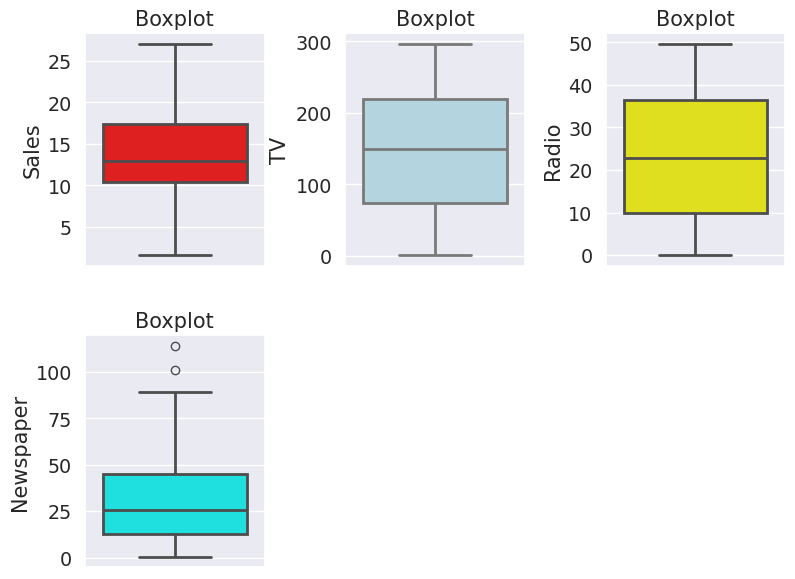

In [29]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
'''
dataset = df.values
X = dataset[:,0:3]
y = dataset[:,3]
'''
#Box plot
plt.figure(figsize=(8,6))
plt.subplots_adjust(top=1, right=1, hspace=0.3, wspace=0.45)
plt.subplot(2,3,1)
sns.boxplot(data=df, y="Sales", orient='v', color='red',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,2)
sns.boxplot(data=df, y="TV", orient='v', color='lightblue',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,3)
sns.boxplot(data=df, y="Radio", orient='v', color='yellow',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,4)
sns.boxplot(data=df, y="Newspaper", orient='v', color='cyan',linewidth=2, width=0.8).set(title='Boxplot')
plt.show()

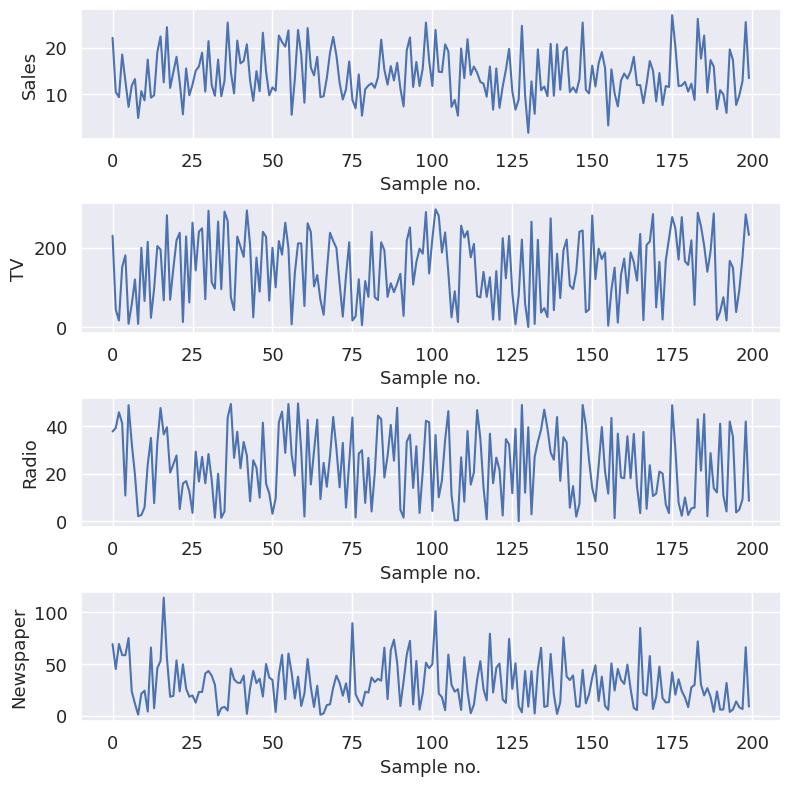

In [30]:
#Line Plot
FS=13
plt.figure(figsize=(8,8))
plt.subplots_adjust(top=1, right=1, hspace=0.5, wspace=0.45)
plt.subplot(4,1,1)
plt.plot(df['Sales'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Sales', fontsize=FS)
plt.subplot(4,1,2)
plt.plot(df['TV'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('TV', fontsize=FS)
plt.subplot(4,1,3)
plt.plot(df['Radio'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Radio', fontsize=FS)
plt.subplot(4,1,4)
plt.plot(df['Newspaper'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Newspaper', fontsize=FS)
plt.show()

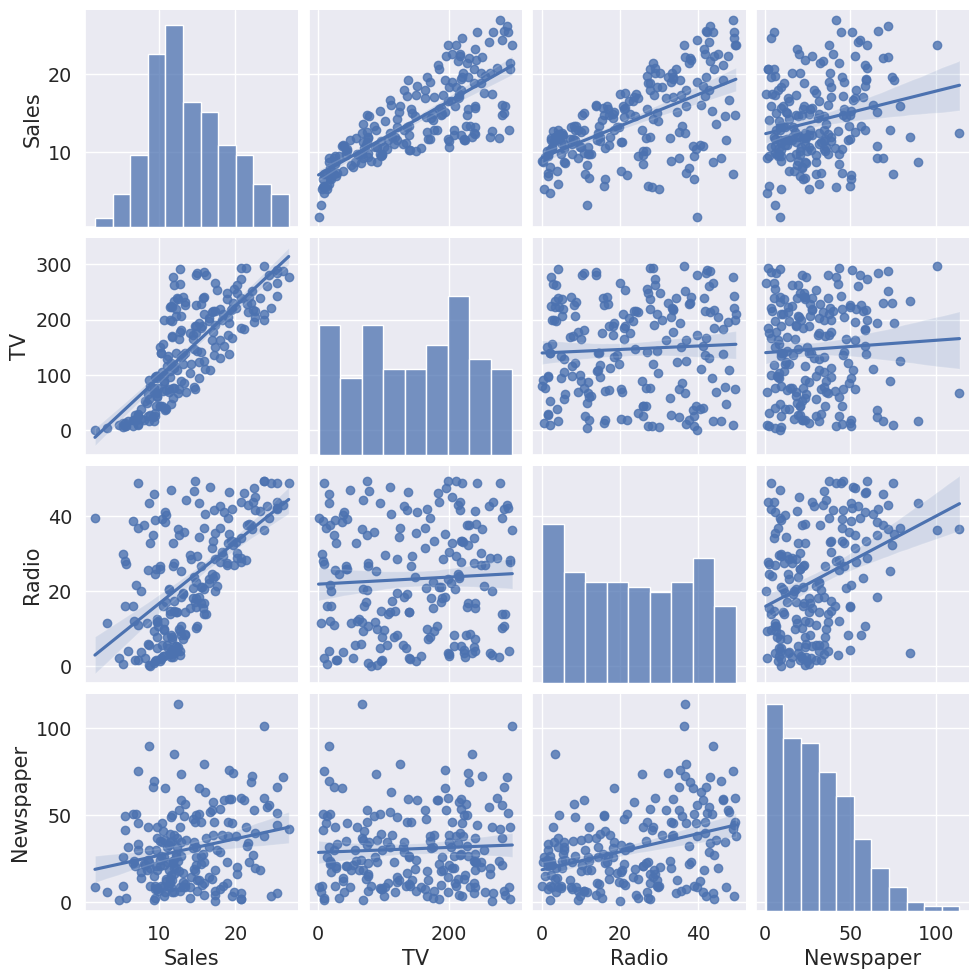

In [31]:
# Matrix plot
sns.pairplot(df[['Sales','TV', 'Radio', 'Newspaper']], kind='reg')
sns.set(font_scale=1.25)
plt.show()

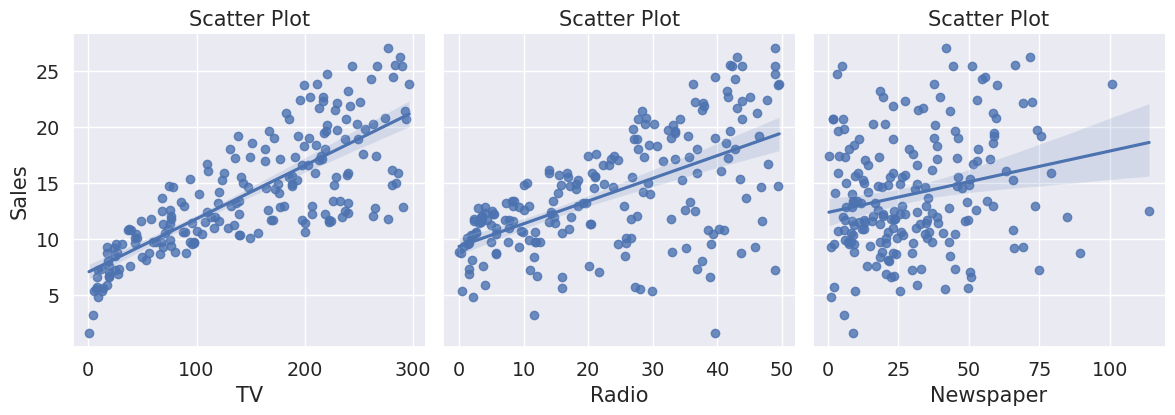

In [32]:
ax=sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                height=4, aspect=1.0, kind='reg')
ax.set(title='Scatter Plot')
plt.show()

In [33]:
# Print correlation coefficients
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix.round(decimals=3))

Correlation matrix is : 
            Unnamed: 0     TV  Radio  Newspaper  Sales
Unnamed: 0       1.000  0.018 -0.111     -0.155 -0.052
TV               0.018  1.000  0.055      0.057  0.782
Radio           -0.111  0.055  1.000      0.354  0.576
Newspaper       -0.155  0.057  0.354      1.000  0.228
Sales           -0.052  0.782  0.576      0.228  1.000


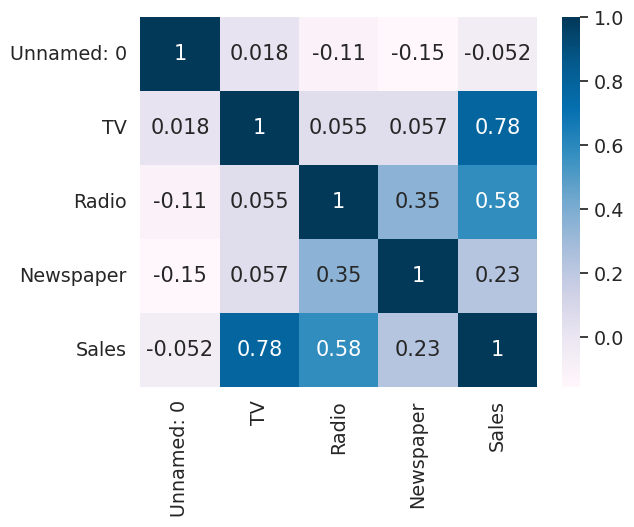

In [34]:
# plotting correlation matrix
sns.heatmap(matrix, cmap="PuBu", annot=True) #Blues, Greens
# Display the plot
plt.show()

In [35]:
# 使用 statsmodels 可以得到詳細報表
# statsmodels 兩種方式
# 方式 1- 這種方式要先將高次項建好
import statsmodels.api as sm
X = sm.add_constant(X)
Statistic = sm.OLS(y,X).fit()
print(Statistic.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        11:45:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [36]:
# 方式 2- 這種方式可以用 Formula 指定高次項
import statsmodels.formula.api as smf
model = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Radio:Newspaper', data=df).fit()
#model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           3.25e-95
Time:                        11:45:15   Log-Likelihood:                -385.95
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1467      0.437     

In [37]:
X_test = X
y_test = y

In [38]:
#Prediction of test set
y_pred= model.predict(X_test)

In [39]:
#Predicted values
print("Prediction for test set:\n{}".format(y_pred))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Prediction for test set:
0      20.593226
1      12.345405
2      12.456766
3      17.665758
4      13.007788
         ...    
195     5.448522
196     8.280876
197    12.888960
198    23.876117
199    15.270363
Length: 200, dtype: float64


,Actual value,Predicted value
0,22.1,20.593226
1,10.4,12.345405
2,9.3,12.456766
3,18.5,17.665758
4,12.9,13.007788


In [40]:
#Model Evaluation
R2score = r2_score(y_test, y_pred)

In [41]:
R2score2 = explained_variance_score(y_test, y_pred, force_finite=False)
meanAbErr = mean_absolute_error(y_test, y_pred)
meanSqErr = mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_pred))
print('R squared: %.3f' %R2score)
print('R squared2: %.3f' %R2score2)
print('Mean Absolute Error: %.4f' %meanAbErr)
print('Mean Square Error: %.4f' %meanSqErr)
print('Root Mean Square Error: %.4f' %rootMeanSqErr)

R squared: 0.897
R squared2: 0.897
Mean Absolute Error: 1.2479
Mean Square Error: 2.7776
Root Mean Square Error: 1.6666


In [42]:
y_pred= model.predict(X_test)
sample_no=len(y_pred)
LW=2; FS=16

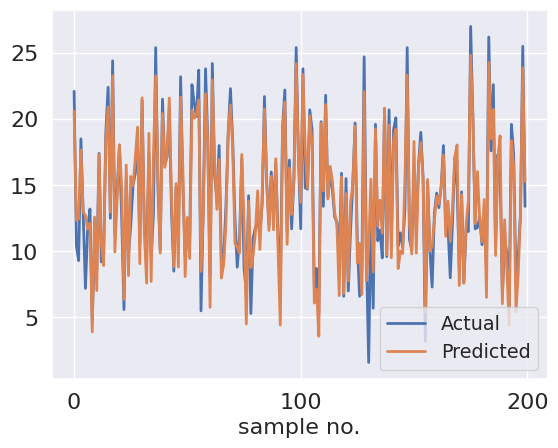

In [43]:
plt.plot(y_test, label='Actual', linewidth=LW)
plt.plot(y_pred, label='Predicted', linewidth=LW)
plt.xticks([0, sample_no/2, sample_no], fontsize=FS)
plt.xlabel('sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.legend(loc='best')
plt.show()

Residual:0.000


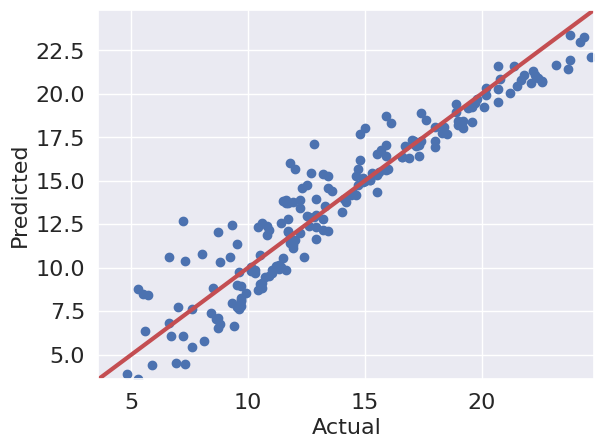

In [44]:
residual=y_test-y_pred
print('Residual:%.3f' %residual.mean()) # residual 的平均數
linestart=y_pred.min()
lineend=y_pred.max()
plt.scatter(y_test, y_pred)
plt.plot([linestart, lineend], [linestart, lineend], color='r', lw=3)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlim(linestart, lineend)
plt.ylim(linestart, lineend)
plt.xlabel('Actual', fontsize=FS)
plt.ylabel('Predicted', fontsize=FS)
plt.show()

In [45]:
# Normality test of residuals using Anderson-Darling test
import statsmodels.api as sm
[AD2, pvalue]=sm.stats.diagnostic.normal_ad(residual)
print('\nAnderson Darling test statistic: %.4f' % AD2)
print ('P-Value: %.4f' % pvalue)


Anderson Darling test statistic: 3.8055
P-Value: 0.0000


In [46]:
# Residual Plot Four-in-One
from scipy.stats import probplot

In [47]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(top=0.9, right=1, hspace=0.5, wspace=0.3)
plt.suptitle('Residual Plots', fontsize=FS+2)

Text(0.5, 0.98, 'Residual Plots')

<Figure size 1000x800 with 0 Axes>

Text(0, 0.5, 'Residuals')

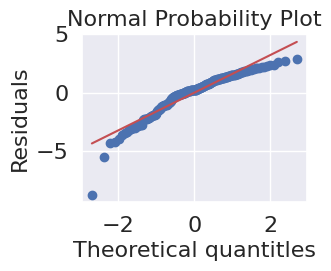

In [48]:
plt.subplot(2,2,1)
rawdata=np.array(residual, dtype=float)
probplot(rawdata, dist='norm', fit=True, plot=plt)
plt.title('Normal Probability Plot', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Theoretical quantitles', fontsize=FS)
plt.ylabel('Residuals', fontsize=FS)

Text(0, 0.5, 'Residual')

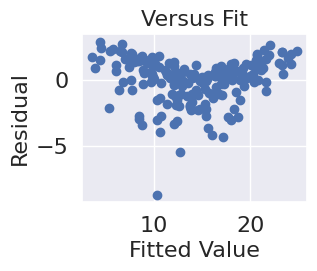

In [49]:
plt.subplot(2,2,2)
plt.scatter(y_pred, residual)
plt.title('Versus Fit', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Fitted Value', fontsize=FS)
plt.ylabel('Residual', fontsize=FS)

Text(0, 0.5, 'Frequency')

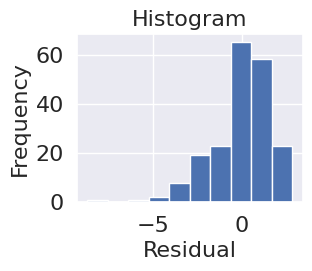

In [50]:
plt.subplot(2,2,3)
plt.hist(residual)
plt.title('Histogram', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Residual', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)

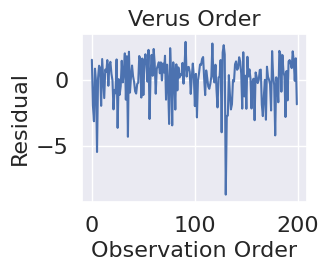

In [51]:
plt.subplot(2,2,4)
plt.plot(residual)
plt.title('Verus Order', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Observation Order', fontsize=FS)
plt.ylabel('Residual', fontsize=FS)
plt.show()